[Orignal paper](https://arxiv.org/abs/1502.03167)

In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm
from MyHelper import *
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
downloadData(filename,loc)

In [4]:
X,y=getData(filename,loc,flat=False)
Xtest,ytest=getData(filename,loc,flat=False,test=True)

In [5]:
print(X.shape,y.shape)
print(Xtest.shape,ytest.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [6]:
img_size,nchannels = X.shape[1],X.shape[-1]
print(img_size)

28


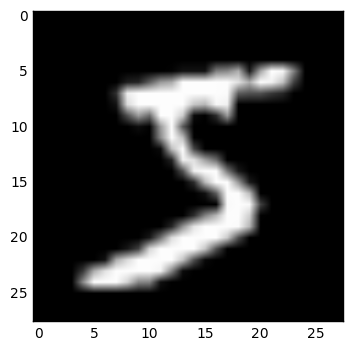

In [7]:
plt.imshow(X[0,:,:,0],cmap='gray')

# Model

In [8]:
def createWeight(size):
    return tf.Variable(tf.truncated_normal(size, stddev=0.1))

def createBias(size):
    return tf.Variable(tf.constant(0.1,shape=size))

def lrelu(x, leak=0.2):
    f1 = 0.5 * (1 + leak)
    f2 = 0.5 * (1 - leak)
    return f1 * x + f2 * abs(x)

## No batch norm

In [9]:
batch_size = 32
g = tf.Graph()
with g.as_default():
    img_input = tf.placeholder(tf.float32,shape=(batch_size,img_size,img_size,nchannels))
    targets = tf.placeholder(tf.float32,shape=(batch_size,10))
    
    testX = tf.constant(Xtest,dtype=tf.float32)
    testy = tf.constant(ytest,dtype=tf.float32)
    
    W_conv1 = createWeight([5,5,nchannels,64])
    b_conv1 = createWeight([64])
    
    W_conv2 = createWeight([5,5,64,128])
    b_conv2 = createWeight([128])
    
    W_logit = createWeight([128*7*7,10])
    b_logit = createWeight([10])
     
    #model
    def model(img_input):
        conv1 = tf.nn.conv2d(img_input,W_conv1,strides=[1,2,2,1],padding="SAME")
        h1 = lrelu(conv1+b_conv1)

        conv2 = tf.nn.conv2d(h1,W_conv2,strides=[1,2,2,1],padding="SAME")
        h2 = lrelu(conv2+b_conv2)

        h2_s = tf.shape(h2)
        h2_flat = tf.reshape(h2,[h2_s[0],128*(h2_s[1])*(h2_s[2])]) #512*2*2

        logit = tf.matmul(h2_flat,W_logit)+b_logit
        
        return logit

    
    #train
    logit_train = model(img_input)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logit_train,targets))
    
    opt = tf.train.AdamOptimizer(learning_rate=.001).minimize(loss)
    
    train_accuracy = tf.reduce_mean(tf.cast(tf.equal(
        tf.arg_max(tf.nn.softmax(logit_train),1),tf.arg_max(targets,1)),tf.float32))
    
    #test
    logit_test = model(testX)
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(
        tf.arg_max(tf.nn.softmax(logit_test),1),tf.arg_max(testy,1)),tf.float32))
    
    init = tf.initialize_all_variables()

In [10]:
sess=tf.Session(graph=g)
sess.run(init)
losses = []

In [11]:
num_steps = 2001
for s in tqdm(range(num_steps)):
    offset = (s*batch_size) % (X.shape[0]-batch_size)
    fd = {img_input:X[offset:offset+batch_size,:],
         targets:y[offset:offset+batch_size,:]}
    l,_ = sess.run([loss,opt],feed_dict=fd)
    losses.append(l)
    if s % 100 == 0:
        print('train acc: ',sess.run([train_accuracy],feed_dict=fd))
        print('test acc: ',sess.run([test_accuracy],feed_dict=fd))

  0%|          | 0/2001 [00:00<?, ?it/s]

train acc:  [0.125]


  0%|          | 4/2001 [00:04<1:36:00,  2.88s/it]

test acc:  [0.1538]


  5%|▍         | 100/2001 [00:07<01:11, 26.52it/s]

train acc:  [0.8125]


  5%|▌         | 106/2001 [00:12<09:50,  3.21it/s]

test acc:  [0.86290002]


 10%|▉         | 199/2001 [00:15<01:07, 26.82it/s]

train acc:  [0.9375]


 10%|█         | 205/2001 [00:19<09:15,  3.23it/s]

test acc:  [0.83789998]


 15%|█▍        | 298/2001 [00:23<01:02, 27.11it/s]

train acc:  [0.96875]


 15%|█▌        | 304/2001 [00:27<08:45,  3.23it/s]

test acc:  [0.87919998]


 20%|█▉        | 400/2001 [00:30<00:59, 27.01it/s]

train acc:  [0.9375]


 20%|██        | 406/2001 [00:34<08:18,  3.20it/s]

test acc:  [0.87849998]


 25%|██▍       | 499/2001 [00:38<00:56, 26.75it/s]

train acc:  [0.9375]


 25%|██▌       | 504/2001 [00:43<09:00,  2.77it/s]

test acc:  [0.91970003]


 30%|██▉       | 598/2001 [00:47<00:52, 26.61it/s]

train acc:  [0.96875]


 30%|███       | 604/2001 [00:51<07:24,  3.14it/s]

test acc:  [0.92729998]


 35%|███▍      | 700/2001 [00:55<00:49, 26.46it/s]

train acc:  [1.0]


 35%|███▌      | 706/2001 [00:59<06:48,  3.17it/s]

test acc:  [0.92769998]


 40%|███▉      | 799/2001 [01:02<00:45, 26.31it/s]

train acc:  [0.96875]


 40%|████      | 805/2001 [01:06<06:15,  3.18it/s]

test acc:  [0.93330002]


 45%|████▍     | 898/2001 [01:10<00:41, 26.78it/s]

train acc:  [0.9375]


 45%|████▌     | 904/2001 [01:14<05:44,  3.19it/s]

test acc:  [0.92839998]


 50%|████▉     | 1000/2001 [01:18<00:40, 24.50it/s]

train acc:  [0.875]


 50%|█████     | 1006/2001 [01:22<05:17,  3.13it/s]

test acc:  [0.93199998]


 55%|█████▍    | 1099/2001 [01:26<00:34, 26.50it/s]

train acc:  [0.9375]


 55%|█████▌    | 1105/2001 [01:30<05:13,  2.86it/s]

test acc:  [0.92809999]


 60%|█████▉    | 1198/2001 [01:34<00:30, 26.42it/s]

train acc:  [0.90625]


 60%|██████    | 1204/2001 [01:38<04:09,  3.19it/s]

test acc:  [0.93349999]


 65%|██████▍   | 1300/2001 [01:42<00:32, 21.59it/s]

train acc:  [0.84375]


 65%|██████▌   | 1306/2001 [01:47<04:06,  2.82it/s]

test acc:  [0.92640001]


 70%|██████▉   | 1399/2001 [01:50<00:23, 25.95it/s]

train acc:  [1.0]


 70%|███████   | 1405/2001 [01:54<03:04,  3.23it/s]

test acc:  [0.94690001]


 75%|███████▍  | 1498/2001 [01:58<00:18, 26.91it/s]

train acc:  [0.9375]


 75%|███████▌  | 1504/2001 [02:02<02:36,  3.18it/s]

test acc:  [0.93760002]


 80%|███████▉  | 1600/2001 [02:06<00:15, 26.44it/s]

train acc:  [0.875]


 80%|████████  | 1606/2001 [02:09<01:43,  3.82it/s]

test acc:  [0.9249]


 85%|████████▍ | 1699/2001 [02:13<00:11, 27.05it/s]

train acc:  [0.875]


 85%|████████▌ | 1705/2001 [02:17<01:32,  3.21it/s]

test acc:  [0.92739999]


 90%|████████▉ | 1798/2001 [02:20<00:07, 26.35it/s]

train acc:  [0.96875]


 90%|█████████ | 1804/2001 [02:24<01:00,  3.25it/s]

test acc:  [0.9522]


 95%|█████████▍| 1900/2001 [02:28<00:04, 21.39it/s]

train acc:  [0.90625]


 95%|█████████▌| 1903/2001 [02:33<00:47,  2.08it/s]

test acc:  [0.95270002]


100%|█████████▉| 1999/2001 [02:37<00:00, 23.02it/s]

train acc:  [0.96875]


100%|██████████| 2001/2001 [02:42<00:00, 12.28it/s]

test acc:  [0.94569999]


In [12]:
p = figure(title="training loss", x_axis_label='train steps', y_axis_label='loss')
p.line(range(len(losses)),losses)
show(p)

## With Batch Norm

In [13]:
def createWeightsBN(s):
    """
    Creates weights for batch normalization layer
    
    Parameters:
    -----------
    s: int
        size of to be normalized
    """
    gamma = tf.Variable(tf.truncated_normal([s]))
    beta = tf.Variable(tf.ones([s]))
    return [gamma,beta]

def BN(x,variables,ri=[0,1,2],eps=.0001):
    """
    Applies Batch Normalization
    
    Parameters:
    ------------
    x: tensor
        the data to normalize
        
    variables: [gamma,beta]
        parameters to learn
        
    ri (optional): [int]
        reduction indicies
    eps (optional): float
        small number to keep from dividing by zero
    """
    gamma,beta = variables[0],variables[1]
    
    mu = tf.reduce_mean(x,ri,keep_dims=True)
    sigma = tf.reduce_mean(tf.square(x-mu),ri,keep_dims=True)
    x_hat = (x-mu)/(tf.sqrt(sigma+eps))
    y = gamma*x_hat+beta
    return y

In [14]:
batch_size = 32
g = tf.Graph()
with g.as_default():
    img_input = tf.placeholder(tf.float32,shape=(batch_size,img_size,img_size,nchannels))
    targets = tf.placeholder(tf.float32,shape=(batch_size,10))
    
    testX = tf.constant(Xtest,dtype=tf.float32)
    testy = tf.constant(ytest,dtype=tf.float32)
    
    bn_input = createWeightsBN(nchannels)
    W_conv1 = createWeight([5,5,nchannels,64])
    b_conv1 = createWeight([64])
    
    bn_1 = createWeightsBN(64)
    W_conv2 = createWeight([5,5,64,128])
    b_conv2 = createWeight([128])
    
    bn_2 = createWeightsBN(128)
    W_logit = createWeight([128*7*7,10])
    b_logit = createWeight([10])
    bn_logit = createWeightsBN(10)
    
    #model
    def model(img_input):
        img_input_bn = BN(img_input,bn_input)
        conv1 = tf.nn.conv2d(img_input_bn,W_conv1,strides=[1,2,2,1],padding="SAME")
        h1 = lrelu(conv1+b_conv1)

        h1_bn = BN(h1,bn_1)
        conv2 = tf.nn.conv2d(h1_bn,W_conv2,strides=[1,2,2,1],padding="SAME")
        h2 = lrelu(conv2+b_conv2)

        h2_bn = BN(h2,bn_2)
        h2_s = tf.shape(h2)
        h2_flat = tf.reshape(h2_bn,[h2_s[0],128*(h2_s[1])*(h2_s[2])]) #512*2*2

        logit = tf.matmul(h2_flat,W_logit)+b_logit
        logit_bn = BN(logit,bn_logit,ri=[0])
        
        return logit_bn

    
    #train
    logit_train = model(img_input)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logit_train,targets))
    
    opt = tf.train.AdamOptimizer(learning_rate=.01).minimize(loss)
    
    train_accuracy = tf.reduce_mean(tf.cast(tf.equal(
        tf.arg_max(tf.nn.softmax(logit_train),1),tf.arg_max(targets,1)),tf.float32))
    
    #test
    logit_test = model(testX)
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(
        tf.arg_max(tf.nn.softmax(logit_test),1),tf.arg_max(testy,1)),tf.float32))
    
    init = tf.initialize_all_variables()

In [15]:
sess=tf.Session(graph=g)
sess.run(init)
losses = []

In [16]:
num_steps = 2001
for s in tqdm(range(num_steps)):
    offset = (s*batch_size) % (X.shape[0]-batch_size)
    fd = {img_input:X[offset:offset+batch_size,:],
         targets:y[offset:offset+batch_size,:]}
    l,_ = sess.run([loss,opt],feed_dict=fd)
    losses.append(l)
    if s % 100 == 0:
        print('train acc: ',sess.run([train_accuracy],feed_dict=fd))
        print('test acc: ',sess.run([test_accuracy],feed_dict=fd))

  0%|          | 0/2001 [00:00<?, ?it/s]

train acc:  [0.78125]


  0%|          | 3/2001 [00:08<3:19:10,  5.98s/it]

test acc:  [0.3874]


  5%|▍         | 99/2001 [00:14<02:03, 15.36it/s] 

train acc:  [0.875]


  5%|▌         | 103/2001 [00:22<27:13,  1.16it/s]

test acc:  [0.8998]


 10%|▉         | 199/2001 [00:28<01:50, 16.27it/s]

train acc:  [0.84375]


 10%|█         | 203/2001 [00:36<26:38,  1.12it/s]

test acc:  [0.92549998]


 15%|█▍        | 299/2001 [00:42<01:52, 15.11it/s]

train acc:  [0.90625]


 15%|█▌        | 303/2001 [00:52<28:08,  1.01it/s]

test acc:  [0.95340002]


 20%|█▉        | 399/2001 [00:59<02:10, 12.32it/s]

train acc:  [0.875]


 20%|██        | 403/2001 [01:07<24:01,  1.11it/s]

test acc:  [0.95709997]


 25%|██▍       | 499/2001 [01:13<01:33, 16.10it/s]

train acc:  [0.9375]


 25%|██▌       | 503/2001 [01:21<20:13,  1.23it/s]

test acc:  [0.96249998]


 30%|██▉       | 599/2001 [01:26<01:26, 16.22it/s]

train acc:  [1.0]


 30%|███       | 603/2001 [01:34<19:00,  1.23it/s]

test acc:  [0.97240001]


 35%|███▍      | 699/2001 [01:40<01:21, 16.04it/s]

train acc:  [0.96875]


 35%|███▌      | 703/2001 [01:47<17:40,  1.22it/s]

test acc:  [0.96749997]


 40%|███▉      | 799/2001 [01:53<01:14, 16.19it/s]

train acc:  [1.0]


 40%|████      | 803/2001 [02:02<18:13,  1.10it/s]

test acc:  [0.97469997]


 45%|████▍     | 899/2001 [02:08<01:07, 16.39it/s]

train acc:  [0.96875]


 45%|████▌     | 903/2001 [02:15<15:01,  1.22it/s]

test acc:  [0.97430003]


 50%|████▉     | 999/2001 [02:21<01:02, 16.03it/s]

train acc:  [0.96875]


 50%|█████     | 1003/2001 [02:28<13:31,  1.23it/s]

test acc:  [0.97399998]


 55%|█████▍    | 1099/2001 [02:34<00:55, 16.24it/s]

train acc:  [0.875]


 55%|█████▌    | 1103/2001 [02:42<12:29,  1.20it/s]

test acc:  [0.9716]


 60%|█████▉    | 1199/2001 [02:48<00:50, 15.99it/s]

train acc:  [0.96875]


 60%|██████    | 1203/2001 [02:55<10:48,  1.23it/s]

test acc:  [0.98030001]


 65%|██████▍   | 1299/2001 [03:02<00:41, 17.04it/s]

train acc:  [0.90625]


 65%|██████▌   | 1303/2001 [03:10<09:41,  1.20it/s]

test acc:  [0.97600001]


 70%|██████▉   | 1399/2001 [03:16<00:36, 16.66it/s]

train acc:  [0.90625]


 70%|███████   | 1403/2001 [03:23<08:06,  1.23it/s]

test acc:  [0.97920001]


 75%|███████▍  | 1499/2001 [03:29<00:30, 16.26it/s]

train acc:  [0.96875]


 75%|███████▌  | 1503/2001 [03:36<06:50,  1.21it/s]

test acc:  [0.97719997]


 80%|███████▉  | 1599/2001 [03:43<00:25, 16.00it/s]

train acc:  [0.96875]


 80%|████████  | 1603/2001 [03:50<05:38,  1.18it/s]

test acc:  [0.98140001]


 85%|████████▍ | 1699/2001 [03:57<00:19, 15.45it/s]

train acc:  [0.96875]


 85%|████████▌ | 1703/2001 [04:05<04:38,  1.07it/s]

test acc:  [0.97939998]


 90%|████████▉ | 1799/2001 [04:11<00:12, 16.03it/s]

train acc:  [0.90625]


 90%|█████████ | 1803/2001 [04:19<02:46,  1.19it/s]

test acc:  [0.98119998]


 95%|█████████▍| 1899/2001 [04:25<00:06, 16.21it/s]

train acc:  [0.9375]


 95%|█████████▌| 1903/2001 [04:32<01:20,  1.22it/s]

test acc:  [0.98220003]


100%|█████████▉| 1999/2001 [04:38<00:00, 16.39it/s]

train acc:  [0.96875]


100%|██████████| 2001/2001 [04:46<00:00,  1.18s/it]

test acc:  [0.9831]


In [17]:
p = figure(title="training loss", x_axis_label='train steps', y_axis_label='loss')
p = figure()
p.line(range(len(losses)),losses)
show(p)